In [50]:
%pylab inline
import pandas as pd
import seaborn as sns
import scipy
import skimage
from pathlib import Path
# output_path_images = Path("../graphics/")
output_path_images = Path("../text/")

df = pd.read_excel("C:/Users/Jirik/data/medical/processed/scaffan2019/metacentrum/SA_experiments.xlsx")
# df = pd.read_excel("C:/Users/Jirik/data/medical/processed/metacentrum/SA_experiments.xlsx")
# df = pd.read_excel("C:/Users/Jirik/data/medical/processed/SA_experiments.xlsx")
df

Populating the interactive namespace from numpy and matplotlib


,Annotation Color,Annotation Details,Annotation ID,Annotation Title,Area,Area unit,Branch number,Central Vein Dice,Central Vein Jaccard,Central vein area,...,Processing;Skeleton Analysis;Working Resolution,Processing;Texture Analysis;GLCM Levels,Processing;Texture Analysis;Tile Size,Processing;Texture Analysis;Tile Spacing,Processing;Texture Analysis;Working Resolution,Scaffan Version,Skeleton length,platform.node,platform.processor,platform.system
0,#00FF00,PFCVI=2 SNI=2 SWP=1 SQZ=0.4 CVM=0 IFE=0,6,NaN,0.777046,mm,22489.0,NaN,NaN,0.056655,...,9.100000e-07,64,64,32,4.000000e-07,0.14.0,45.58554,krux2.ncbr.muni.cz,NaN,Linux
1,#00FF00,PFCVI=1 SNI=0 SWP=0 CMP=0.8,6,NaN,1.959020,mm,8871.0,NaN,NaN,0.085619,...,9.100000e-07,64,64,32,4.000000e-07,0.14.0,18.66592,konos2.fav.zcu.cz,NaN,Linux
2,#00FF00,PFCVI=1 SNI=0 SWP=0 CMP=0.9,1,NaN,1.562744,mm,NaN,0.108730,0.057491,0.137554,...,9.100000e-07,64,64,32,4.000000e-07,0.14.0,NaN,charon01.nti.tul.cz,NaN,Linux
3,#00FF00,PFCVI=1 SNI=0 SWP=0 CMP=0.9,2,NaN,1.031514,mm,NaN,0.072651,0.037695,0.148508,...,9.100000e-07,64,64,32,4.000000e-07,0.14.0,NaN,charon01.nti.tul.cz,NaN,Linux
4,#00FF00,PFCVI=1 SNI=0 SWP=0 SQZ=0.1,6,NaN,1.184912,mm,NaN,0.035911,0.018284,0.148555,...,9.100000e-07,64,64,32,4.000000e-07,0.14.0,NaN,charon01.nti.tul.cz,NaN,Linux
5,#00FF00,PFCVI=1 SNI=0 SWP=0 CMP=0.9,9,NaN,1.516211,mm,NaN,0.146922,0.079285,0.328527,...,9.100000e-07,64,64,32,4.000000e-07,0.14.0,NaN,charon01.nti.tul.cz,NaN,Linux
6,#00FF00,PFCVI=1 SNI=0 SWP=0 CMP=0.9,10,NaN,0.949162,mm,NaN,0.007296,0.003661,0.044330,...,9.100000e-07,64,64,32,4.000000e-07,0.14.0,NaN,charon01.nti.tul.cz,NaN,Linux
7,#00FF00,PFCVI=1 SNI=2 SWP=0 CMP=0.7,2,NaN,0.647260,mm,NaN,0.701224,0.539912,0.004535,...,9.100000e-07,64,64,32,4.000000e-07,0.14.0,NaN,charon01.nti.tul.cz,NaN,Linux
8,#00FF00,PFCVI=1 SNI=2 SWP=0 CMP=0.7,3,NaN,0.848491,mm,NaN,0.700725,0.539320,0.016983,...,9.100000e-07,64,64,32,4.000000e-07,0.14.0,NaN,charon01.nti.tul.cz,NaN,Linux
9,#00FF00,PFCVI=2 SNI=2 SWP=1 SQZ=0.4 CVM=0,4,NaN,0.809961,mm,NaN,0.531313,0.361760,0.007486,...,9.100000e-07,64,64,32,4.000000e-07,0.14.0,NaN,charon01.nti.tul.cz,NaN,Linux


In [51]:
df.keys()

Index(['Annotation Color', 'Annotation Details', 'Annotation ID',
       'Annotation Title', 'Area', 'Area unit', 'Branch number',
       'Central Vein Dice', 'Central Vein Jaccard', 'Central vein area',
       'Datetime', 'Dead ends number', 'Experiment Datetime',
       'Experiment Title', 'File Name', 'File Path', 'GLCM Correlation',
       'GLCM Correlation p10', 'GLCM Correlation p25', 'GLCM Correlation p50',
       'GLCM Correlation p75', 'GLCM Correlation p90', 'GLCM Correlation var',
       'GLCM Energy', 'GLCM Energy p10', 'GLCM Energy p25', 'GLCM Energy p50',
       'GLCM Energy p75', 'GLCM Energy p90', 'GLCM Energy var',
       'GLCM Homogenity', 'GLCM Homogenity p10', 'GLCM Homogenity p25',
       'GLCM Homogenity p50', 'GLCM Homogenity p75', 'GLCM Homogenity p90',
       'GLCM Homogenity var', 'Input;Data Info', 'Input;File Path', 'Job ID',
       'Lobulus Border Dice', 'Lobulus Border Jaccard',
       'Lobulus Boundary Compactness', 'Lobulus Equivalent Diameter',
       '

In [52]:
df["Experiment Title"].unique()

array(['first seg eval', 'first segmentation params'], dtype=object)

In [53]:
df["Experiment Datetime"].unique()

array(['2019-07-23 22:32:14', '2019-07-23 22:31:23',
       '2019-07-23 22:32:29'], dtype=object)

In [54]:
select_by_datetime = ['2019-07-23 22:32:29']
exp_title = "first segmentation params"

In [55]:
dfselector =  \
(df["Experiment Title"] == exp_title) &\
(df["Experiment Datetime"].isin(select_by_datetime)) 
# (df["Experiment Datetime"] == select_by_datetime) # &\

In [56]:


df[dfselector][
    ["Central Vein Jaccard", "Lobulus Border Jaccard", 'Processing;Lobulus Segmentation;Central Vein Segmentation;Threshold']
]

,Central Vein Jaccard,Lobulus Border Jaccard,Processing;Lobulus Segmentation;Central Vein Segmentation;Threshold
2,0.057491,0.405271,0.2
3,0.037695,0.813757,0.2
4,0.018284,0.888639,0.2
5,0.079285,0.950546,0.2
6,0.003661,0.975832,0.2
7,0.539912,0.898777,0.2
8,0.539320,0.925042,0.2
9,0.361760,0.956952,0.2
10,0.036576,0.859332,0.2
11,0.559442,0.874646,0.2


In [57]:
df["Central Vein Threshold"] = df['Processing;Lobulus Segmentation;Central Vein Segmentation;Threshold']

pd.pivot_table(
    df[df["Central Vein Threshold"] == 0.18], 
    values=[ "Lobulus Border Jaccard"], 
#     columns=["Central Vein Threshold"], 
    index=["File Name", "Annotation ID"], 
    margins=True, 
#     margins_name=["Central Vein Threshold"]
)

,
File Name,Annotation ID
All,


In [58]:
df["Central Vein Threshold"] = df['Processing;Lobulus Segmentation;Central Vein Segmentation;Threshold']
pd.pivot_table(
    df, 
    values=["Central Vein Jaccard"], 
    columns=["Central Vein Threshold", ], 
    index=["File Name", "Annotation ID"], 
    margins=True,# "Central Vein Threshold", #True, 
#     margins_name=["Central Vein Threshold"]
)

Central Vein Jaccard  \
Central Vein Threshold                                                     0.2   
File Name                                   Annotation ID                        
PIG-001_J-17-0571_LM central_HE.ndpi        1                         0.057491   
                                            2                         0.037695   
                                            6                         0.018284   
                                            9                         0.079285   
                                            10                        0.003661   
PIG-002_J-18-0091_HE.ndpi                   2                         0.539912   
                                            10                        0.036576   
                                            3                         0.539320   
                                            4                         0.361760   
PIG-002_J-18-0092_HE.ndpi                   0                         0.559442   
PIG-003_J-18-0165_HE.ndpi                   2                         0.636331   
                                            0                         0.073495   
                                            7                         0.405821   
                                            8                         0.494781   
PIG-003_J-18-0166_HE.ndpi                   1                         0.444329   
                                            7                         0.308558   
PIG-003_J-18-0167_HE.ndpi                   6                              NaN   
PIG-003_J-18-0169_HE.ndpi                   8                              NaN   
PIG-003_J-18-0170_HE.ndpi                   10                             NaN   
PIG-004_BBJ-004-2 _HE_parenchyme.ndpi       9                         0.694469   
                                            4                         0.455919   
PIG-004_BBJ-004-4_HE_parenchyme.ndpi        1                         0.175848   
                                            9                         0.388333   
                                            3                         0.536873   
                                            4                         0.548780   
                                            0                         0.616463   
PIG-008_P008 LL-C_HE_parenchyme centr..ndpi 3                              NaN   
All                                                                   0.348410   

                                                                               
Central Vein Threshold                                         0.22       All  
File Name                                   Annotation ID                      
PIG-001_J-17-0571_LM central_HE.ndpi        1              0.053259  0.055375  
                                            2              0.036474  0.037084  
                                            6              0.016692  0.017488  
                                            9              0.071262  0.075274  
                                            10             0.002211  0.002936  
PIG-002_J-18-0091_HE.ndpi                   2              0.508260  0.524086  
                                            10             0.030206  0.033391  
                                            3              0.143100  0.341210  
                                            4              0.334055  0.347908  
PIG-002_J-18-0092_HE.ndpi                   0              0.269522  0.414482  
PIG-003_J-18-0165_HE.ndpi                   2              0.306707  0.471519  
                                            0              0.207752  0.140624  
                                            7              0.143221  0.274521  
                                            8              0.249875  0.372328  
PIG-003_J-18-0166_HE.ndpi                   1              0.296451  0.370390  
                                            7              0.207595  0.2580

In [59]:
# pd.melt(df)

# Boxplots



Whiskers proportionaly extends low and high quartiles by 1.5 of the  interquartile range (IQR). Points outside this range are be identified as outliers.

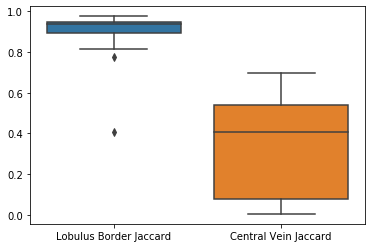

In [60]:

dfs = df[dfselector][[
                "Lobulus Border Jaccard",
                "Central Vein Jaccard"
]]
dfsmelt = pd.melt(dfs)
ax = sns.boxplot(x="variable", y="value", data=dfsmelt)
plt.xlabel('')
plt.ylabel('')
plt.savefig(output_path_images / "segmentation_jaccard.pdf", bbox_inches='tight')
plt.savefig(output_path_images / "segmentation_jaccard.png", bbox_inches='tight', dpi=800)
# ax = sns.swarmplot(x="variable", y="value", data=dfsmelt, color=".25")

# dfsmelt = pd.melt(dfs).rename(columns={"variable":"Structure", "value":"Jaccard Index"})
# sns.boxplot(x="Structure", y="Jaccard Index", data=dfsmelt)


In [61]:
dfs.describe()

,Lobulus Border Jaccard,Central Vein Jaccard
count,26.000000,23.000000
mean,0.898454,0.348410
std,0.111724,0.233618
min,0.405271,0.003661
25%,0.891174,0.076390
50%,0.935809,0.405821
75%,0.949566,0.539616
max,0.975832,0.694469


C:\Users\Jirik\Miniconda3\envs\scaffan\lib\site-packages\seaborn\categorical.py:1324: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\Users\Jirik\Miniconda3\envs\scaffan\lib\site-packages\seaborn\categorical.py:1328: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


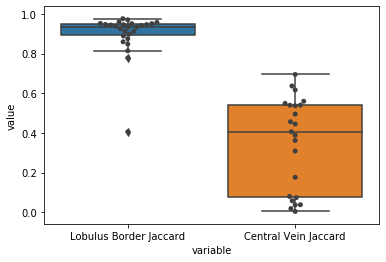

In [62]:

dfs = df[df["Experiment Title"] == 'first segmentation params'][[
                "Lobulus Border Jaccard",
                "Central Vein Jaccard"
]]
dfsmelt = pd.melt(dfs)
ax = sns.boxplot(x="variable", y="value", data=dfsmelt)
plt.xlabel('')
plt.ylabel('')
ax = sns.swarmplot(x="variable", y="value", data=dfsmelt, color=".25")

# dfsmelt = pd.melt(dfs).rename(columns={"variable":"Structure", "value":"Jaccard Index"})
# sns.boxplot(x="Structure", y="Jaccard Index", data=dfsmelt)


Text(0, 0.5, '')

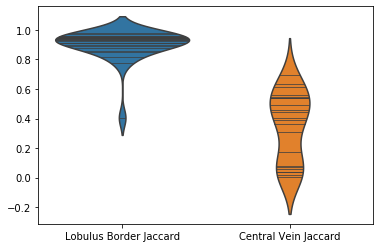

In [63]:
ax = sns.violinplot(x="variable", y="value", data=dfsmelt,
              inner="stick")
# ax = sns.swarmplot(x="variable", y="value", data=dfsmelt, color=".25")
plt.xlabel('')
plt.ylabel('')